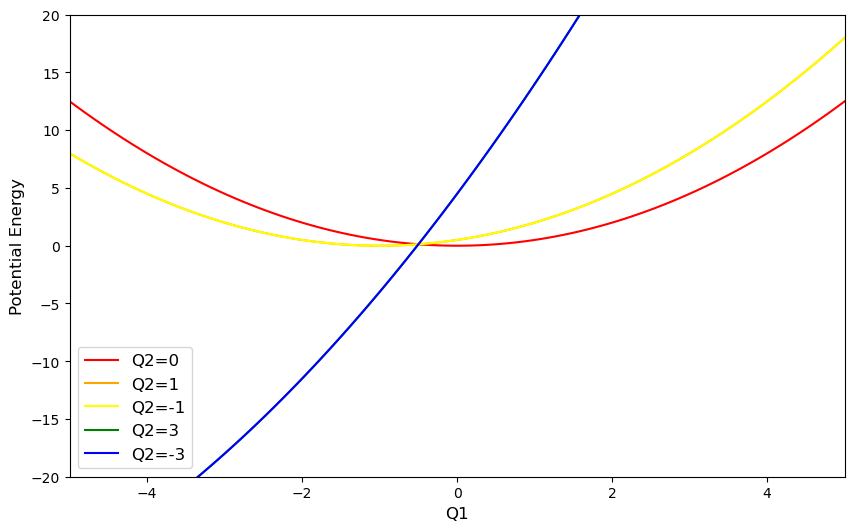

interactive(children=(FloatSlider(value=1.0, description='k1', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

<function __main__.plot_contour(k1=1, k2=1, c=0, levels=10)>

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider, IntSlider
plt.style.use('seaborn-v0_8-dark-palette')

def coupledOscillators(q1, q2, k1, k2, c):
    return (0.5*(k1*q1*q1 + k2*q2*q2) +  c*q1*q2*q2)

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100) # could just pass the same linspace for Q1 and Q2, but this helps readability

plt.figure(figsize=(10, 6))

# First plot, testing constant Q2 values
yLinearQ20 = coupledOscillators(x1, 0, 1, 1, 1) # Any constants are trivial, behavior is what matters)
plt.plot(x1, yLinearQ20, color='red', label='Q2=0')
yLinearQ21 = coupledOscillators(x1, 1, 1, 1, 1) # Any constants are trivial, behavior is what matters)
plt.plot(x1, yLinearQ21, color='orange', label='Q2=1')
yLinearQ2n1 = coupledOscillators(x1, -1, 1, 1, 1) # Any constants are trivial, behavior is what matters)
plt.plot(x1, yLinearQ2n1, color='yellow', label='Q2=-1')
yLinearQ23 = coupledOscillators(x1, 3, 1, 1, 1) # Any constants are trivial, behavior is what matters)
plt.plot(x1, yLinearQ23, color='green', label='Q2=3')
yLinearQ2n3 = coupledOscillators(x1, -3, 1, 1, 1) # Any constants are trivial, behavior is what matters)
plt.plot(x1, yLinearQ2n3, color='blue', label='Q2=-3')
#Hard to see without testing, but the functions give the same output for the same *absolute value* of q2, it doesn't care about the sign!

plt.xlim([-5, 5])
plt.ylim([-20, 20])
plt.xlabel('Q1', fontsize=12)
plt.ylabel('Potential Energy', fontsize=12)
plt.legend(fontsize=12)

# Contour plot of U(Q1, Q2)

def plot_contour(k1=1, k2=1, c=0, levels=10): 
    # Copied from the Notebook, ie. the best practice in coding of taking someone else's code when it's already been written
    # define x,y min, max
    x_min = -5
    x_max = 5
    y_min = -5
    y_max = 5
    
    # Generate the grid
    q1 = np.linspace(x_min, x_max, 400)
    q2 = np.linspace(y_min, y_max, 400)
    Q1, Q2 = np.meshgrid(q1, q2)

    # Define the function
    Z = k1 * Q1**2 + k2 * Q2**2 + c * Q1 * Q2

    # Create the plot
    plt.figure(figsize=(4, 4))
    contour_filled = plt.contourf(Q1, Q2, Z, levels=levels, cmap='viridis')
    contour_lines = plt.contour(Q1, Q2, Z, levels=levels, colors='black', linewidths=0.5)

    # Add labels inline
    # plt.clabel(contour_lines, inline=True, fontsize=8)

    # Add Color Bar
    cbar = plt.colorbar(contour_filled)
    cbar.set_label('Potential Energy', fontsize=12) 
    # Should be kept this way generally (or even passed a label variable) but for this exercise, defining it with a more appropriate label is helpful

    # Set axis labels and range
    plt.xlabel('$Q_1$', fontsize=12)
    plt.ylabel('$Q_2$', fontsize=12)
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])

    # Display the plot
    plt.show()

interact(plot_contour,
         k1=FloatSlider(min=-2, max=2, step=0.1, value=1, description='k1'),
         k2=FloatSlider(min=-2, max=2, step=0.1, value=1, description='k2'),
         c=FloatSlider(min=-2, max=2, step=0.1, value=0, description='c'),
         levels=IntSlider(min=5, max=20, step=1, value=10, description='Levels')       
        )

1. They stretch out along a diagonal depending on sign, eventually splitting off into a function with 2 local maxima/minima
2. No! U outputs the same at Q2 = x and Q2 = -x! The direction of Q2 doesn't matter
3. An increase in Q2 would mean a 1:1 decrease in Q1 in order to maintain the same potential energy. 
4. It will begin to move the opposite direction of Q1's displacement!